In [1]:
from pandas_datareader import data
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from datetime import date
from datetime import datetime
from datetime import timedelta
from tsfresh.transformers import RelevantFeatureAugmenter
from sklearn.pipeline import Pipeline
import h2o
from h2o.automl import H2OAutoML
import math
import numpy as np

In [5]:
#checking how the library works and parameters required
data.DataReader?

In [2]:
ticks=["DDD",
"MMM",
"WBAI",
"WUBA",
"EGHT",
"AHC",
"AOS",
"ATEN",
"AIR",
"AAN",
"ABB",
"ABT",
"ABBV",
"ANF",
"AGD",
"AWP",
"ACP",
"JEQ",
"ASGI",
"AOD",
"ABM",
"AKR",
"ACEL",
"ACN",
"ACCO",
"ATV",
"AYI",
"GOLF",
"ADX",
"PEO",
"ADCT",
"AGRO",
"ADNT",
"ADT",
"ATGE",
"AAP",
"ADSW",
"WMS",
"ASIX",
"AVK",
"ACM",
"AEFC",
"AEB",
"AEG",
"AER",
"AJRD",
"AMG",
"MGR",
"AFL",
"MITT",
"AGCO",
"A",
"AEM",
"ADC",
"AL",
"APD",
"ALG",
"AGI",
"ALK",
"AIN",
"ALB",
"ACI",
"AA",
"ALC",
"ALEX",
"ALX",
"ARE",
"AQN",
"AQNA",
"AQNB",
"BABA",
"Y",
"ATI",
"ALLE",
"ALE",
"ADS",
"AFB",
"AWF",
"AB",
"AIO",
"CBH",
"NCV",
"NCZ",
"ACV",
"NFJ",
"NIE",
"ALSN",
"ALL",
"ALLY",
"PINE",
"ALTG",
"AYX",
"ATUS",
"MO",
"ACH",
"ALUS",
"AMBC",
"ABEV",
"AMC",
"AMCR",
"AEE",
"AMRC",
"AMOV",
"AMX",
"AAT",
"AXL",
"ACC",
"AEO",
"AEP",
"AEL",
"AXP",
"AFG",
"AFGB",
"AFGC",
"AFGD",
"AFGH",
"AMH",
"AIG",
"ARL",
"ARA",
"AWR",
"AMT",
"AVD",
"AWK",
"COLD",
"AMP",
"ABC",
"RYCE",
"AMN",
"AMRX",
"AP",
"APH",
"AXR",
"HKIB",
"AME",
"PLAN",
"DYFN",
"FINS",
"AU",
"BUD",
"NLY",
"AM",
"AR",
"ANTM",
"ANH",
"AON",
"AIV",
"APG",
"ARI",
"APO",
"AFT",
"AIF",
"APLE",
"AIT",
"ATR",
"APTV",
"ARMK",
"ABR",
"ARC",
"MT",
"MTCN",
"ARCH",
"ADM",
"AROC",
"ARNC",
"ARCO",
"ACA",
"RCUS",
"ARD",
"ASC",
"AFC",
"ACRE",
"ARDC",
"ARES",
"AGX",
"ARGD",
"ARGO",
"ANET",
"AI",
"AIC",
"AIW",
"ARLO",
"AHH",
"ARR",
"AFI",
"AWI",
"ARW",
"AJG",
"APAM",
"ASA",
"ABG",
"ASX",
"ASGN",
"AHT",
"ASH",
"ASPN",
"AMK",
"ASB",
"AC",
"AIZ",
"AIZP",
"AGO",
"AZN",
"HOME",
"T",
"TBB",
"TBC",
"ATTO",
"ATH",
"ATKR",
"AT",
"ATCO",
"ATO",
"ACB",
"ATHM",
"ALV",
"AN",
"AZO",
"AVLR",
"AVB",
"AGR",
"AVNS",
"AVTR",
"AVYA",
"AVY",
"AVNT",
"AVA",
"AXTA",
"AXS",
"AX",
"AXO",
"AZUL",
"AZRE",
"AZZ",
"BGS",
"BMRG",
"BW",
"BGH",
"BMI",
"BCSF",
"BKR",
"BBN",
"BLL",
"BANC",
"BBAR",
"BBVA",
"BBD",
"BBDO",
"BCH",
"BLX",
"BSBR",
"BSAC",
"BSMX",
"SAN",
"CIB",
"BXS",
"BAC",
"BOH",
"BMO",
"NTB",
"BNS",
"BKU",
"BCS",
"BBDC",
"MCI",
"MPV",
"BNED",
"B",
"GOLD",
"BHC",
"BAX",
"BTE",
"BBX",
"BCE",
"BZH",
"BDX",
"BDXB",
"BDC",
"BRBR",
"BHE",
"BHLB",
"BERY",
"BBY",
"BEST",
"BGSF",
"BHP",
"BBL",
"BIG",
"BH",
"BILL",
"BHVN",
"BIO",
"BITA",
"BJ",
"BKH",
"BKI",
"BSM",
"BB",
"BGIO",
"BFZ",
"CII",
"BHK",
"HYT",
"BTZ",
"DSU",
"BGR",
"BDJ",
"EGF",
"FRA",
"BFO",
"BGT",
"BOE",
"BME",
"BMEZ",
"BAF",
"BKT",
"BGY",
"BKN",
"BTA",
"BZM",
"MHE",
"BIT",
"MUI",
"MUA",
"BKK",
"BBK",
"BBF",
"BYM",
"BFK",
"BLE",
"BTT",
"MEN",
"MUC",
"MUH",
"MHD",
"MFL",
"MUJ",
"MHN",
"MUE",
"MUS",
"MVT",
"MYC",
"MCA",
"MYD",
"MYF",
"MFT",
"MIY",
"MYJ",
"MYN",
"MPA",
"MQT",
"MYI",
"MQY",
"BNY",
"BQH",
"BSE",
"BFY",
"BCX",
"BST",
"BSTZ",
"BSD",
"BUI",
"BHV",
"BLK",
"BGB",
"BGX",
"BSL",
"BE",
"APRN",
"BXG",
"BXC",
"DCF",
"DHF",
"DMB",
"DSM",
"LEO",
"BA",
"BCC",
"BCEI",
"BOOT",
"BAH",
"BWA",
"BORR",
"SAM",
"BXP",
"BSX",
"BOX",
"BYD",
"BPMP",
"BP",
"BPT",
"BRC",
"BHR",
"BDN",
"BWG",
"LND",
"BAK",
"BRFS",
"MNRL",
"BFAM",
"BEDU",
"BSA",
"BSIG",
"BV",
"EAT",
"BCO",
"BMY",
"BMY~",
"VTOL",
"BTI",
"BRX",
"BRMK",
"BR",
"BKD",
"BAM",
"BBU",
"BIPC",
"BIP",
"RA",
"BEPC",
"BEP",
"BRO",
"BRT",
"BC",
"BKE",
"BVN",
"BBW",
"BG",
"BURL",
"BWXT",
"BY",
"CABO",
"CBT",
"COG",
"CACI",
"WHD",
"CADE",
"CAE",
"CAI",
"CAL",
"CWT",
"CALX",
"ELY",
"CPE",
"CPT",
"CCJ",
"CPB",
"CWH",
"GOOS",
"CM",
"CNI",
"CNQ",
"CP",
"CANG",
"CNNE",
"CAJ",
"CGC",
"CMD",
"COF",
"CSU",
"BXMT",
"CPRI",
"CMO",
"CAH",
"CSL",
"KMX",
"CCL",
"CUK",
"CRS",
"CSV",
"CARR",
"CARS",
"CRI",
"CVNA",
"CSPR",
"CSLT",
"CTLT",
"CTT           ",
"CAT",
"CATO",
"CBZ",
"CBL",
"CBO",
"IGR",
"CBRE",
"CBX",
"PCPL",
"FUN",
"CDR",
"CE",
"CLS",
"CELG~",
"CEL",
"CPAC",
"CX",
"CVE",
"CNC",
"CEN",
"CNP",
"EBR",
"CEPU",
"CCS",
"CTL",
"CDAY",
"CF",
"GIB",
"CHX",
"ECOM          ",
"CHAP",
"CHRA",
"CRL",
"CLDT",
"CMCM",
"CHGG",
"CHE",
"CC",
"CHMI",
"CPK",
"CVX",
"CHWY",
"CHS",
"CIM",
"DL",
"CEA",
"CHN",
"CGA",
"LFC",
"CHL",
"COE",
"SNP",
"ZNH",
"CHA",
"CHU",
"CYD",
"CMG",
"CHH",
"CB",
"CHT",
"CHD",
"CCX",
"CCXX",
"CIEN",
"CI",
"XEC",
"CBB",
"CNK",
"CINR",
"CIR",
"CIT",
"CCAC",
"BLW",
"C",
"CFG",
"CIA",
"CIO",
"CVEO",
"CCC",
"CLH",
"CCO",
"EMO",
"CEM",
"CTR",
"CLW",
"CWEN",
"CLF",
"CLPR",
"CLX",
"CLDR",
"NET",
"CMS",
"CMSA",
"CMSC",
"CMSD",
"CNA",
"CNF",
"CNHI",
"CNO",
"CEO",
"CNXM",
"CNX",
"KOF",
"KO",
"CCEP",
"CDE",
"FOF",
"CNS",
"UTF",
"LDP",
"MIE",
"RQI",
"RNP",
"PSF",
"RFI",
"CFX",
"CFXA",
"CL",
"CCH",
"CXE",
"CIF",
"CXH",
"CMU",
"CLNY",
"CLNC",
"CXP",
"STK",
"CCZ",
"CMA",
"FIX",
"CMC",
"CBU",
"CYH",
"CHCT",
"CIG",
"CBD",
"SBS",
"ELP",
"CCU",
"CODI",
"CMP",
"CRK",
"CAG",
"CXO",
"CCM",
"CNMD",
"COP",
"CCR",
"CEIX",
"ED",
"STZ",
"CSTM",
"TCS",
"CLR",
"VLRS",
"CTRA",
"CTB",
"CPS",
"CTK",
"CPA",
"CLB",
"CXW",
"CLGX",
"CORR",
"CPLG",
"COR",
"CNR",
"GLW",
"CAAP",
"GYC",
"OFC",
"CTVA",
"CZZ",
"CMRE",
"COTY",
"CUZ",
"CVA",
"CPF",
"CR",
"BAP",
"CS",
"CPG",
"CEQP",
"CRH",
"CRT",
"CAPL",
"CCI",
"CCK",
"CRY",
"CTS",
"CUBE",
"CUB",
"CFR",
"CULP",
"CMI",
"CURO",
"CW",
"SRV",
"SZC",
"CWK",
"CUBB",
"CUBI",
"CVI",
"UAN",
"CVS",
"CELP",
"DHI",
"DAN",
"DHR",
"DAC",
"DQ",
"DRI",
"DAR",
"DVA",
"DCP",
"DECK",
"DE",
"DEX",
"DDF",
"DKL",
"DK",
"DELL",
"DLPH",
"DAL",
"DLX",
"DBI",
"DESP",
"DB",
"DVN",
"DHX",
"DHT",
"DEO",
"DSSI",
"DRH",
"DSX",
"DKS",
"DBD",
"DMS",
"DLR",
"DDS",
"DDT",
"DIN",
"DFS",
"DNI",
"DMYT",
"DLB",
"DG",
"D",
"DCUE",
"DRUA",
"DPZ",
"UFS",
"DCI",
"DFIN",
"LPG",
"DSL",
"DBL",
"DLY",
"PLOW",
"DEI",
"DOV",
"DVD",
"DOW",
"RDY",
"DRD",
"DRQ",
"DS",
"DTE",
"DTJ",
"DTP",
"DTQ",
"DTW",
"DTY",
"DCO",
"DSE",
"DNP",
"DTF",
"DUC",
"DPG",
"DUK",
"DUKB",
"DUKH",
"DRE",
"DNB",
"DD",
"DXC",
"DY",
"DLNG",
"DT",
"DX",
"ELF",
"EXP",
"ECC",
"ECCB",
"ECCX",
"ECCY",
"EIC",
"ESTE",
"DEA",
"EGP",
"EMN",
"KODK",
"ETN",
"ETV",
"ETW",
"EV",
"EOI",
"EOS",
"EFT",
"EFL",
"EFF",
"EHT",
"ETX",
"EOT",
"EVN",
"ETJ",
"EFR",
"EVF",
"EVG",
"EVT",
"ETO",
"ETG",
"ETB",
"EXD",
"ETY",
"EXG",
"ECL",
"EC",
"EPC",
"EIX",
"EW",
"ELAN",
"ELAT",
"ESTC",
"EGO",
"ESI",
"ELVT",
"LLY",
"EFC",
"EARN",
"ERJ",
"EME",
"EEX",
"EBS",
"EMR",
"ESRT",
"EIG",
"EDN",
"ENBL",
"ENB",
"ENBA",
"EHC",
"DAVA",
"EXK",
"ENIA",
"ENIC",
"ENR",
"ET",
"EPAC",
"ERF",
"ENS",
"E",
"ENLC",
"EBF",
"ENVA",
"NPO",
"ETM",
"EAB",
"EAE",
"EAI",
"ETR",
"ELC",
"ELJ",
"ELU",
"EMP",
"ENJ",
"ENO",
"EZT",
"EPD",
"EVC",
"ENV",
"NVST",
"EVA",
"ENZ",
"EOG",
"EPAM",
"EPR",
"EQT",
"EFX",
"EQNR",
"EQH",
"ETRN",
"EQC",
"ELS",
"EQR",
"EQS",
"EROS",
"ESE",
"ESNT",
"EPRT",
"WTRG",
"WTRU",
"ESS",
"EL",
"ETH",
"EURN",
"EEA",
"EB",
"EVR",
"RE",
"EVRG",
"EVRI",
"ES",
"EVTC",
"EVH",
"AQUA",
"XAN",
"EXPR",
"EXTN",
"EXR",
"XOM",
"FNB",
"FN",
"FDS",
"FICO",
"SFUN",
"FPAC",
"FTCH",
"FPI",
"FSLY",
"FBK",
"FFG",
"AGM",
"FRT",
"FSS",
"FMN",
"FHI",
"FDX",
"RACE",
"FOE",
"FCAU",
"FNF",
"FIS",
"FMO",
"FINV",
"FAF",
"FBP",
"FCF",
"TCRW",
"TCRZ",
"FSLF",
"FHN",
"FR",
"AG",
"FRC",
"FFA",
"FMY",
"FDEU",
"FIF",
"FSD",
"FTHY",
"FPF",
"FEI           ",
"FPL",
"FIV",
"FCT",
"FGB",
"FEO",
"FAM",
"FE",
"FIT",
"FPH",
"FVRR",
"FBC",
"DFP",
"PFD",
"PFO",
"FFC",
"FLC",
"FLT",
"FLNG",
"FND",
"FTK",
"FLO",
"FLS",
"FLR",
"FLY",
"FEAC",
"FMC",
"WPF",
"FMX",
"FL",
"F",
"FOR",
"FTS",
"FTV",
"FTAI",
"FVAC",
"FSM",
"FBHS",
"FET",
"FBM",
"FCPT",
"FEDU",
"FNV",
"FC",
"FSB",
"BEN",
"FT",
"FI",
"FCX",
"FMS",
"FDP",
"RESI",
"FRO",
"FSK",
"FSKR",
"FCN",
"FF",
"GCV",
"GAB",
"GGZ",
"GGT",
"GUT",
"GLEO",
"GBL",
"GNT",
"GME",
"GCI",
"GPS",
"GTX",
"IT",
"GLOG",
"GLOP",
"GTES",
"GATX",
"GMTA",
"GCP",
"GNK",
"GNRC",
"GAM",
"GD",
"GE",
"GIS",
"GM",
"GCO",
"GEL",
"GEN           ",
"GNE",
"G",
"GPC",
"GNW",
"GEO",
"GPRK",
"GPJA",
"GGB",
"GTY",
"GFL",
"GFLU",
"GIX",
"GIX~",
"GIK",
"GIL",
"GLT",
"GKOS",
"GSK",
"CO",
"GMRE",
"GNL",
"GLP",
"GPN",
"GSL",
"GSLD",
"GLOB",
"GL",
"GMED",
"GMS",
"GDDY",
"GOL",
"GFI",
"GSBD",
"GS",
"GER",
"GMZ",
"GRC",
"GPX",
"GGG",
"GRAF",
"EAF",
"GHM",
"GHC",
"GRAM",
"GVA",
"GPMT",
"GPK",
"GTN",
"AJX",
"AJXA",
"GWB",
"GDOT",
"GBX",
"GHL",
"GHG",
"GEF",
"GFF",
"GPI",
"GRUB",
"PAC",
"ASR",
"AVAL",
"SUPV",
"TV",
"GSX",
"GTT",
"GSH",
"GES",
"GGM",
"GPM",
"GOF",
"GBAB",
"GWRE",
"HRB",
"FUL",
"HAE",
"HAL",
"HBB",
"HBI",
"HNGR",
"HASI",
"HOG",
"HMY",
"HSC",
"HGH",
"HIG",
"HVT",
"HE",
"HCHC",
"HCA",
"HCI",
"HDB",
"HR",
"HTA",
"PEAK",
"HL",
"HEI",
"HLX",
"HP",
"HLF",
"HRI",
"HCXY",
"HCXZ",
"HTGC",
"HRTG",
"PSV",
"HT",
"HSY",
"HTZ",
"HES",
"HESM",
"HPE",
"HXL",
"HEXO",
"PCF",
"HGLB",
"HFRO",
"HPR",
"HIW",
"HIL",
"HI",
"HRC",
"HTH",
"HGV",
"HLT",
"HNI",
"HMLP",
"HEP",
"HFC",
"HD",
"HMC",
"HON",
"HMN",
"HZN",
"HTFA",
"HRL",
"HST",
"HLI",
"HOV",
"HHC",
"HWM",
"HPQ",
"HSBC",
"HMI",
"HNP",
"HUBB",
"HUBS",
"HBM",
"HUD",
"HPP",
"HUM",
"HCFT",
"HII",
"HUN",
"HUYA",
"H",
"HY",
"IAA",
"IAG",
"IBN",
"ICL",
"IDA",
"IEX",
"IDT",
"INFO",
"ITW",
"IMAX",
"ICD",
"IHC",
"IRT",
"IFN",
"IBA",
"INFY",
"ING",
"IR",
"NGVT",
"INGR",
"IIPR",
"IPHI",
"INSI",
"NSP",
"INSP",
"IBP",
"ITGR",
"ICE",
"IHG",
"IFS",
"IBM",
"IFF",
"IFFT",
"IGT",
"IP",
"INSW",
"IPV",
"IPG",
"IPI",
"IVC",
"VBF",
"VCV",
"VTA",
"IHIT",
"IHTA",
"VLT",
"IVR",
"OIA",
"VMO",
"VKQ",
"VPV",
"IVZ",
"IQI",
"VVR",
"VTN",
"VGM",
"IIM",
"IRET",
"NVTA",
"INVH",
"IO",
"IQV",
"IRM",
"IRS",
"STAR          ",
"ITCB",
"ITUB",
"ITT",
"IVH",
"JPM",
"JAX",
"JILL",
"SJM",
"JBL",
"J",
"JHX",
"JHG",
"JOF",
"JWS",
"JBGS",
"JEF",
"JELD",
"JCAP",
"JT",
"JKS",
"JMP",
"JBT",
"BTO",
"HEQ",
"JHS",
"JHI",
"HPF",
"HPI",
"HPS",
"PDT",
"HTD",
"HTY",
"JNJ",
"JCI",
"JLL",
"JMIA",
"JIH",
"JNPR",
"JP",
"JE",
"LRN",
"KAI",
"KDMN",
"KAMN",
"KSU",
"KAR",
"KMF",
"KYN",
"KB",
"KBH",
"KBR",
"K",
"KMPR",
"KMT",
"KW",
"KEN",
"KDP",
"KEY",
"KEYS",
"KRC",
"KRP",
"KMB",
"KIM",
"KMI",
"KFS",
"KGC",
"KEX",
"KL",
"KRG",
"KKR",
"KIO",
"KREF",
"KNX",
"KNL",
"KNOP",
"KN",
"KSS",
"PHG",
"KTB",
"KOP",
"KEP",
"KF",
"KFY",
"KOS",
"KRA",
"KR",
"KRO",
"KT",
"LB",
"SCX",
"LHX",
"LH",
"LADR",
"LAIX",
"LW",
"LCI",
"LPI",
"LVS",
"LGI",
"LAZ",
"LZB",
"LCII",
"LEAF",
"LEA",
"LEE",
"LGC",
"LMHA",
"LMHB",
"LEG",
"JBK",
"KTH",
"KTN",
"LDOS",
"LEJU",
"LMND",
"LC",
"LEN",
"LII",
"LEVI",
"LXP",
"LPL",
"DFNS",
"USA",
"ASG",
"LBRT",
"LSI",
"LITB",
"LNC",
"LIN",
"LNN",
"LN",
"LINX",
"LAD",
"LAC",
"LYV",
"LOAK",
"LTHM",
"RAMP",
"LYG",
"SCD",
"LMT",
"L",
"LOMA",
"LGVW",
"LPX",
"LOW",
"LXU",
"LTC",
"LUB",
"LL",
"LXFR",
"LDL",
"LYB",
"MTB",
"MDC",
"MHO",
"MAC",
"CLI",
"MFD",
"MGU",
"MIC",
"BMA",
"M",
"MCN",
"MSGE",
"MSGS",
"MMP",
"MGA",
"MX",
"MGY",
"MHLA",
"MHNC",
"MAIN",
"MMD",
"MNK",
"MANU",
"MTW",
"MN",
"MAN",
"MFC",
"MRO",
"MPC",
"MMI",
"MCS",
"MPX",
"HZO",
"MKL",
"VAC",
"MMC",
"MLM",
"MAS",
"DOOR",
"MTZ",
"MA",
"MTDR",
"MTRN",
"MATX",
"MLP",
"MAXR",
"MMS",
"MXL",
"MEC",
"MBI",
"MKC",
"MCD",
"MUX",
"MCK",
"MDU",
"MTL",
"MDLA",
"MPW",
"MED",
"MCC",
"MCV",
"MCX",
"MDLQ",
"MDLX",
"MDLY",
"MD",
"MDT",
"MFAC",
"MRK",
"MCY",
"MDP",
"MTH",
"MTOR",
"MTR",
"MSB",
"MEI",
"MET",
"MCB",
"MTD",
"MXE",
"MXF",
"MFA",
"MFO",
"MCR",
"MGF",
"MIN",
"MMT",
"MFM",
"MFV",
"MTG",
"MGP",
"MGM",
"MFGP",
"MAA",
"AMPY",
"MLR",
"HIE",
"MTX",
"MG",
"MUFG",
"MIXT",
"MFG",
"MBT",
"MODN",
"MOD",
"MC",
"MOGU",
"MHK",
"MOH",
"TAP",
"MNR",
"MR",
"MEG",
"MCO",
"MS",
"CAF",
"MSD",
"EDD",
"IIF",
"MOS",
"MSI",
"MOV",
"MPLX",
"MRC",
"MSA",
"MSM",
"MSCI",
"MSGN",
"MLI",
"MWA",
"MVF",
"MZA",
"MUR",
"MUSA",
"MVO",
"MVC",
"MVCD",
"MYE",
"MYOV",
"NBR",
"NC",
"NTP",
"NTEST",
"NBHC",
"NFG",
"NGG",
"NHI",
"NOV",
"NPK",
"NNN",
"NRUC",
"SID",
"NSA",
"NTCO",
"NGS",
"NGVC",
"NRP",
"NTZ",
"NWG",
"NLS",
"NVGS",
"NNA",
"NM",
"NMM",
"NAV",
"NCR",
"NP",
"NNI",
"NPTN",
"NSCO",
"NVRO",
"HYB",
"NFH",
"GF",
"NWHM",
"IRL",
"NMFC",
"NMFX",
"EDU",
"NEWR",
"NRZ",
"SNR",
"NYCB",
"NYT",
"NJR",
"NEU",
"NEM",
"NR",
"NEXA",
"NREF",
"NXRT",
"NHF",
"NEP",
"NEE",
"NEX",
"NGL",
"NLSN",
"NKE",
"NINE",
"NIO",
"NI",
"NL",
"NOAH",
"NOK",
"NOMD",
"NMR",
"OSB",
"NAT",
"JWN",
"NSC",
"NOA",
"NRT",
"NOC",
"NWN",
"NWE",
"NCLH",
"NVS",
"NVO",
"DNOW",
"NRG",
"NUS",
"NUE",
"NS",
"NSS",
"NTR",
"NVG",
"NUV",
"NUW",
"NEA",
"NAZ",
"NKX",
"NCB",
"NCA",
"NAC",
"JCE",
"JCO",
"JQC",
"JDD",
"DIAX",
"JEMD",
"NEV",
"JFR",
"JRO",
"NKG",
"JGH",
"JHY",
"JHAA",
"JHB",
"NXC",
"NXN",
"NID",
"NMY",
"NMT",
"NUM",
"NMS",
"NOM",
"JLS",
"JMM",
"NHA",
"NZF",
"NMCO",
"NMZ",
"NMI",
"NJV",
"NXJ",
"NRK",
"NYV",
"NNY",
"NAN",
"NUO",
"NPN",
"NQP",
"JPC",
"JPS",
"JPT",
"JPI",
"NAD",
"JRI",
"JRS",
"BXMX",
"SPXX",
"NIM",
"NXP",
"NXQ",
"NXR",
"NSL",
"JSD",
"NBB",
"JTD",
"JTA",
"NPV",
"NIQ",
"NVT",
"NVR",
"CTEST",
"OAC",
"OXY",
"OII",
"OCN",
"OFG",
"OGE",
"OI",
"OIS",
"ODC",
"ORI",
"OLN",
"OHI",
"OMC",
"ONDK",
"OGS",
"OLP",
"OCFT",
"OMF",
"OKE",
"ONE",
"ONTO",
"OOMA",
"OPY",
"ORCL",
"ORAN",
"ORC",
"OEC",
"ORN",
"IX",
"ORA",
"OSK",
"OR",
"SFTW",
"OTIS",
"OUT",
"OSG",
"OVV",
"OMI",
"OC",
"ORCC",
"OXM",
"ROYT",
"PACD",
"PCG",
"PCGU",
"PKG",
"PD",
"PAGS",
"PANW",
"PAM",
"PHX",
"PARR",
"PAR",
"PGRE",
"PKE",
"PK",
"PH",
"PE",
"PSN",
"PRTY",
"PAYC",
"PBF",
"PBFX",
"BTU",
"PSO",
"PEB",
"PBA",
"PEI",
"PFSI",
"PMT",
"PAG",
"PNR",
"PEN",
"PFGC",
"PKI",
"PBT",
"PVL",
"PRT",
"PRGO",
"PRSP",
"PTR",
"PBR",
"PFE",
"GHY",
"ISD",
"PGTI",
"PM",
"PSX",
"PSXP",
"FENG",
"DNK",
"PHR",
"DOC",
"PDM",
"PCQ",
"PCK",
"PZC",
"PCM",
"PTY",
"PCN",
"PCI",
"PDI",
"NRGX",
"PGP",
"PHK",
"PKO",
"PFL",
"PFN",
"PMF",
"PML",
"PMX",
"PNF",
"PNI",
"PYN",
"RCS",
"PING",
"PNW",
"PINS",
"PHD",
"PHT",
"MAV",
"MHI",
"PXD",
"PIPR",
"PBI",
"PIC",
"PJT",
"PAA",
"PAGP",
"PLNT",
"PLT",
"AGS",
"PHI",
"PLYM",
"PNC",
"PNM",
"PII",
"POR",
"PKX",
"POST",
"PSTL",
"PPG",
"PPX",
"PPL",
"PYS",
"PYT",
"PQG",
"PDS",
"APTS",
"PBH",
"PVG",
"PRI",
"PRMW",
"PGZ",
"PRA",
"PG",
"PGR",
"PLD",
"PUMP",
"PRO",
"PROS",
"PBB",
"PBC",
"PBY",
"PB",
"PRLB",
"PFS",
"PJH",
"PRH",
"PRS",
"PRU",
"PUK",
"PSB",
"TLK",
"PEG",
"PSA",
"PHM",
"PSTG",
"PMM",
"PIM",
"PMO",
"PPT",
"NEW",
"PVH",
"PZN",
"QTWO",
"QEP",
"QGEN",
"QTS",
"QUAD",
"KWR",
"NX",
"PWR",
"QD",
"DGX",
"QUOT",
"QVCC",
"QVCD",
"CTAA",
"CTBB",
"CTDD",
"CTV",
"CTY",
"CTZ",
"RRD",
"RMED",
"RDN",
"RFL",
"RL",
"RRC",
"RNGR",
"PACK",
"RJF",
"RYAM",
"RYN",
"RTX",
"RMAX",
"RC",
"RCA",
"RCB",
"RCP",
"RLGY",
"O",
"RLH",
"RWT",
"RBC",
"RM",
"RF",
"RGS",
"RGA",
"RZA",
"RZB",
"RS",
"RELX",
"RNR",
"SOL",
"RENN",
"RPLA",
"RSG",
"REZI",
"RMD",
"RFP",
"QSR",
"RPAI",
"RVI",
"REVG",
"REV",
"RVLV",
"REX",
"REXR",
"RXN",
"RH",
"RNG",
"RIO",
"RBA",
"RAD",
"RFM",
"RMM",
"RMI",
"RIV",
"RSF",
"OPP",
"RLI",
"RLJ",
"RMG",
"RHI",
"ROK",
"RCI",
"ROG",
"ROL",
"ROP",
"RST",
"RY",
"RCL",
"RGT",
"RMT",
"RVT",
"RES",
"RPM",
"RPT",
"RYB",
"R",
"RYI",
"RHP",
"SPGI",
"SBR",
"SB",
"SFE",
"SAFE",
"SAIL",
"CRM",
"SMM",
"SBH",
"SJT",
"SD",
"PER",
"SAND          ",
"SC",
"SAP",
"SAF",
"SAK",
"SAR",
"SSL",
"BFS",
"SCPE",
"SLB",
"SNDR",
"SWM",
"SAIC",
"SALT",
"SBBA",
"STNG",
"SMG",
"KTF",
"KSM",
"SRL",
"SCU",
"SCVX",
"SE",
"SA",
"CKH",
"SMHI",
"SEE",
"SEAS",
"WTTR",
"SEM",
"SLQT",
"SRE",
"SREA",
"ST",
"SXT",
"SQNS",
"SRG",
"SCI",
"SERV",
"NOW",
"SFL",
"SHAK",
"SJR",
"SHLX",
"SHW",
"FOUR",
"SHG",
"SHOP",
"SSTK",
"SBSW",
"SIG",
"SBOW",
"SI",
"SPG",
"SSD",
"SHI",
"SITC",
"SITE",
"SIX",
"TSLX",
"SJW",
"SKM",
"SKX",
"SKY",
"SLG",
"WORK",
"SM",
"SMAR",
"SNN",
"SNAP",
"SNA",
"IPOB",
"IPOC",
"SQM",
"SOGO",
"SOI",
"SWI",
"SAH",
"SON",
"SNE",
"SOS",
"SOR",
"SJI",
"SJIJ",
"SJIU",
"SO",
"SOJA",
"SOJB",
"SOJC",
"SOJD",
"SOLN",
"SCCO",
"LUV",
"SWX",
"SWN",
"SPAQ",
"SPE",
"SPB           ",
"SR",
"SPR",
"SAVE",
"SRC",
"SPOT",
"SRLP",
"SII",
"SPXC",
"FLOW",
"SQ",
"JOE",
"STAG",
"SMP",
"SXI",
"SWK",
"SWT",
"STN",
"SGU",
"SRT",
"STWD",
"STT",
"SPLP",
"SCS",
"SCA",
"SCM",
"SCL",
"STE",
"STL",
"STC",
"SF",
"SFB",
"STM",
"EDF",
"EDI",
"STON",
"SRI",
"STOR",
"GJH",
"GJO",
"GJS",
"SYK",
"MSC",
"RGR",
"SPH",
"SMFG",
"INN",
"SUM",
"SMLP",
"SUI",
"SLF",
"SXC",
"SU",
"STG",
"NOVA",
"SUN",
"SHO",
"SPN",
"SUP",
"SOAC",
"SUZ",
"SWZ",
"SWCH",
"SBE",
"SYF",
"SNX",
"SNV",
"GJP",
"GJR",
"GJT",
"SYY",
"SYX",
"TLRD",
"TWN",
"TSM",
"TAK",
"TAL",
"TALO",
"SKT",
"TPR",
"TRGP",
"TGT",
"TARO",
"TTM",
"TCO",
"TMHC",
"TRP",
"TCP",
"TSI",
"TEL",
"TISI",
"FTI",
"TECK",
"TK",
"TGP",
"TNK",
"TGNA",
"TRC",
"HQH",
"THQ",
"HQL",
"THW",
"TDOC",
"TEO",
"TDY",
"TFX",
"VIV",
"TEF",
"TDA",
"TDE",
"TDI",
"TDJ",
"TDS",
"TU",
"TDF",
"EMF",
"TEI",
"GIM",
"TPX",
"TS",
"TME",
"THC",
"TNC",
"TEN",
"TVC",
"TVE",
"TDC",
"TEX",
"TX",
"TRNO",
"TTI",
"TEVA",
"TPL",
"TGH",
"TXT",
"TFII",
"AES",
"AZEK",
"BK",
"BX",
"CEE",
"SCHW",
"COO",
"GDV",
"GRX",
"GDL",
"THG",
"THGA",
"TRV",
"TMO",
"THR",
"TPRE",
"TRI",
"THO",
"TDW",
"TIF",
"TLYS",
"TSU",
"TKR",
"TMST",
"TWI",
"TJX",
"TOL",
"TR",
"BLD",
"TTC",
"TD",
"SHLL",
"NDP",
"TYG",
"TEAF",
"NTG",
"TTP",
"TPZ",
"TOT",
"TSQ",
"TM",
"TRTX",
"TT",
"TAC",
"TCI",
"TDG",
"RIG",
"TGS",
"TRU",
"TREC",
"TG",
"THS",
"TREX",
"TY",
"TPH",
"TRNE",
"TNET",
"TRN",
"TSE",
"TPVG",
"TPVY",
"GTS",
"TRTN",
"TGI",
"TROX",
"TBI",
"TFC",
"TNP",
"TUFN",
"TUP",
"TKC",
"TPB",
"TRQ",
"TPC",
"TWLO",
"TRWH",
"TWTR",
"TWO",
"TYL",
"TSN",
"USB",
"USPH",
"SLCA",
"USX",
"UBER",
"UI",
"UBS",
"UDR",
"UGI",
"UGP",
"UMH",
"UA",
"UAA",
"UFI",
"UNF",
"UN",
"UL",
"UNP",
"UIS",
"UMC",
"UNFI",
"UPS",
"URI",
"USM",
"UZA",
"UZB",
"UZC",
"X",
"UNH",
"UTL",
"UNVR",
"UVV",
"UHT",
"UHS",
"UVE",
"UTI",
"UNM",
"UNMA",
"UE",
"UBA",
"UBP",
"USFD",
"USAC",
"USNA",
"USDP",
"BIF",
"VFC",
"EGY",
"MTN",
"VAL",
"VALE",
"VLO",
"VHI",
"VMI",
"VVV",
"VAPO",
"VAR",
"VGR",
"VEC",
"AAPL",
"VEDL",
"VEEV",
"VEL",
"VNTR",
"VTR",
"VNE",
"VER",
"VRTV",
"VZ",
"VET",
"VRS",
"VCIF",
"VRT",
"VVI",
"VICI",
"VNCE",
"VIPS",
"SPCE",
"VHC",
"VGI",
"ZTR",
"V",
"VSH",
"VPG",
"VIST",
"VSTO",
"VST",
"VVNT",
"VSLR",
"VMW",
"VOC",
"VCRA",
"VNO",
"VJET",
"IAE",
"IHD",
"VOYA",
"IGA",
"IGD",
"IDE",
"IID",
"IRR",
"PPR",
"VMC",
"WTI",
"WPC",
"WRB",
"GRA",
"GWW",
"WNC",
"WDR",
"WD",
"WMT",
"DIS",
"HCC",
"WPG",
"WRE",
"WCN",
"WM",
"WAT",
"WSO",
"WTS",
"W",
"WBS",
"WEC",
"WEI",
"WRI",
"WMK",
"WBT",
"WFC",
"EOD",
"WELL",
"WCC",
"WST",
"WAL",
"WALA",
"WEA",
"TLI",
"EMD",
"GDO",
"EHI",
"HIX",
"HIO",
"HYI",
"SBI",
"IGI",
"PAI",
"MMU",
"WMC",
"DMO",
"MTT",
"MHF",
"MNP",
"GFY",
"WIW",
"WIA",
"WES",
"WU",
"WAB",
"WLK",
"WLKP",
"WBK",
"WRK",
"WHG",
"WEX",
"WY",
"WPM",
"WHR",
"WTM",
"WSR",
"WLL",
"WOW",
"WMB",
"WSM",
"WGO",
"WIT",
"WNS",
"WWW",
"WF",
"WK",
"INT",
"WWE",
"WOR",
"WPP",
"WPX",
"WYND",
"WH",
"XYF",
"XFLT",
"XHR",
"XRX",
"XIN",
"XPO",
"XYL",
"AUY",
"YELP",
"YETI",
"YEXT",
"YRD",
"DAO",
"YPF",
"YUMC",
"YUM",
"ZEN",
"ZBH",
"ZTS",
"ZTO",
"ZUO",
"ZYME",
"GOED",
"XXII",
"FAX",
"IAF",
"AEF",
"FCO",
"ACU",
"ATNM",
"AE",
"ACY",
"UAVS",
"AGE",
"AIRI",
"AXU",
"AAU",
"APT",
"AAMC",
"AMBO",
"DIT",
"AMS",
"USAS",
"AMPE",
"ANVS",
"ARMP",
"AINC",
"AUG",
"AWX",
"ASM",
"BTG",
"BTN",
"BCV",
"BHB",
"BRN",
"BATL",
"BIOX",
"PHGE",
"BGI",
"BKTI",
"BDR",
"BRBS",
"BRG",
"DMF",
"CMCL",
"CEI",
"CANF",
"YCBD",
"CVM",
"CET",
"LEU",
"CHAQ",
"CCF",
"CQP",
"LNG",
"CVR",
"CPHI",
"CKX",
"GLV",
"GLQ",
"GLO",
"COHN",
"CIX",
"LODE",
"CDOR",
"MCF",
"CMT",
"CRMD",
"CRF",
"CLM",
"CVU",
"CIK",
"DHY",
"CRHM",
"CTO",
"CTEK",
"DXR",
"VCF",
"VFL",
"VMM",
"DLA",
"DNN",
"DSS",
"DPW",
"DXF",
"GRF",
"EVM",
"CEV",
"EVV",
"EIM",
"ENX",
"EVY",
"ELMD",
"ELLO",
"ECF",
"EMAN",
"MSN",
"EMX",
"UUUU",
"ENSV",
"ELA",
"EQX",
"ESP",
"EVBN",
"EVI",
"EPM",
"FEN",
"BDL",
"FSI",
"FTF",
"FSP",
"FRD",
"FTSI",
"GAU",
"GGN",
"JOB",
"GMO",
"GSB",
"GSAT",
"GORO",
"GSV",
"AUMN",
"GSS",
"GV",
"GDP",
"GTE",
"GPL",
"SIM",
"AIM",
"HMG",
"HUSA",
"IBIO",
"IBO",
"IMH",
"IMO",
"IOR",
"IGC",
"INDO",
"INFU",
"IHT",
"NSPR",
"ITRG",
"INS",
"THM",
"INTT",
"INUV",
"VKI",
"ISR",
"ISDR",
"ITP",
"KLR",
"KIQ",
"LGL",
"LCTX",
"MAG",
"MHH",
"MTNB",
"MMX",
"IPB",
"MTA",
"MXC",
"MLSS",
"MYO",
"NNVC",
"ATEST",
"NHC",
"NAVB",
"NTIP",
"NBW",
"NHS",
"NML",
"NBH",
"NBO",
"NRO",
"GBR",
"NEN",
"NGD",
"NXE",
"NAK",
"NOG",
"NBY",
"NG",
"NTN",
"NES",
"OBLG",
"OCX",
"OGEN",
"PTN",
"PZG",
"PRK",
"PED",
"PFNX",
"HNW",
"PLAG",
"PLG",
"PLM",
"PW",
"PLX",
"RLGT",
"UTG",
"RHE",
"RCG",
"RVP",
"REI",
"SACC",
"SACH",
"SCCB",
"SNMP",
"SEB",
"SENS",
"SVT",
"SMTS",
"SIF",
"SVM",
"SILV",
"XPL",
"LOV",
"STXS",
"SSY",
"SDPI",
"SYN",
"TKAT",
"TRX",
"TGB",
"TGC",
"GLU",
"GGO",
"TMBR",
"TMP",
"TAT",
"TRXC",
"TMQ",
"TPHS",
"TRT",
"UFAB",
"UAMY",
"UUU",
"URG",
"UEC",
"VGZ",
"VNRX",
"VOLT",
"EAD",
"ERC",
"ERH",
"WRN",
"WYY",
"WTT",
"XTNT",
"ZDGE",
"ZOM"]

In [5]:
test=pd.DataFrame(pd.DataFrame(data.DataReader(ticks,'yahoo',start=date(2022, 2, 1)\
                                                     ,end=date.today()-timedelta(days=3))\
                                        ['Adj Close']).stack())


/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'WBAI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'WUBA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AHC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ATV', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ADSW', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarnin

/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BCEI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BSA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BMY~', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'COG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CAI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning

/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CRY', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CUB', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DLPH', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DSSI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DNI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning

/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'FSKR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'GLEO', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'GLOG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'GMTA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'GEN           ', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: 

/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DFNS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'LN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'LINX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'LOAK', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'LGVW', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarnin

/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'JTD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'JTA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CTEST', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'OAC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ONDK', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarnin

/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'WORK', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'IPOB', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'IPOC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'SOGO', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'SNE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarni

/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'WDR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'WPG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'WRI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'WALA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'TLI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning:

KeyError: 'Symbols'

In [12]:

for i in (list(test.reset_index()['Symbols'].unique())):
    print(i)

DDD
MMM
EGHT
AOS
ATEN
AIR
AAN
ABB
ABT
ABBV
ANF
AGD
AWP
ACP
JEQ
ASGI
AOD
ABM
AKR
ACEL
ACN
ACCO
AYI
GOLF
ADX
PEO
ADCT
AGRO
ADNT
ADT
ATGE
AAP
WMS
ASIX
AVK
ACM
AEFC
AEG
AER
AJRD
AMG
MGR
AFL
MITT
AGCO
A
AEM
ADC
AL
APD
ALG
AGI
ALK
AIN
ALB
ACI
AA
ALC
ALEX
ALX
ARE
AQN
AQNA
AQNB
BABA
Y
ATI
ALLE
ALE
ADS
AFB
AWF
AB
AIO
CBH
NCV
NCZ
ACV
NFJ
NIE
ALSN
ALL
ALLY
PINE
ALTG
AYX
ATUS
MO
ACH
AMBC
ABEV
AMC
AMCR
AEE
AMRC
AMOV
AMX
AAT
AXL
ACC
AEO
AEP
AEL
AXP
AFG
AFGB
AFGC
AFGD
AMH
AIG
ARL
AWR
AMT
AVD
AWK
COLD
AMP
ABC
AMN
AMRX
AP
APH
AXR
AME
PLAN
DYFN
FINS
AU
BUD
NLY
AM
AR
ANTM
AON
AIV
APG
ARI
APO
AFT
AIF
APLE
AIT
ATR
APTV
ARMK
ABR
ARC
MT
MTCN
ARCH
ADM
AROC
ARNC
ARCO
ACA
RCUS
ASC
ACRE
ARDC
ARES
AGX
ARGD
ARGO
ANET
AI
AIC
ARLO
AHH
ARR
AFI
AWI
ARW
AJG
APAM
ASA
ABG
ASX
ASGN
AHT
ASH
ASPN
AMK
ASB
AC
AIZ
AGO
AZN
T
TBB
TBC
ATTO
ATKR
ATCO
ATO
ACB
ATHM
ALV
AN
AZO
AVLR
AVB
AGR
AVNS
AVTR
AVYA
AVY
AVNT
AVA
AXTA
AXS
AX
AZUL
AZRE
AZZ
BGS
BW
BGH
BMI
BCSF
BKR
BBN
BLL
BANC
BBAR
BBVA
BBD
BBDO
BCH
BLX
BSBR
BSAC
BSMX
SAN
CIB
BAC
B

UVE
UTI
UNM
UNMA
UE
UBA
UBP
USFD
USAC
USNA
USDP
BIF
VFC
EGY
MTN
VAL
VALE
VLO
VHI
VMI
VVV
VAPO
VGR
VEC
AAPL
VEEV
VEL
VNTR
VTR
VNE
VRTV
VZ
VET
VRS
VCIF
VRT
VVI
VICI
VNCE
VIPS
SPCE
VHC
VGI
ZTR
V
VSH
VPG
VIST
VSTO
VST
VVNT
VMW
VOC
VCRA
VNO
VJET
IAE
IHD
VOYA
IGA
IGD
IDE
VMC
WTI
WPC
WRB
GWW
WNC
WD
WMT
DIS
HCC
WRE
WCN
WM
WAT
WSO
WTS
W
WBS
WEC
WEI
WMK
WBT
WFC
EOD
WELL
WCC
WST
WAL
WEA
EMD
GDO
EHI
HIX
HIO
HYI
SBI
IGI
PAI
MMU
WMC
DMO
MHF
MNP
WIW
WIA
WES
WU
WAB
WLK
WLKP
WRK
WHG
WEX
WY
WPM
WHR
WTM
WSR
WLL
WOW
WMB
WSM
WGO
WIT
WNS
WWW
WF
WK
INT
WWE
WOR
WPP
WH
XYF
XFLT
XHR
XRX
XIN
XPO
XYL
AUY
YELP
YETI
YEXT
YRD
DAO
YPF
YUMC
YUM
ZEN
ZBH
ZTS
ZTO
ZUO
ZYME
GOED
XXII
FAX
IAF
AEF
FCO
ACU
ATNM
AE
ACY
UAVS
AGE
AIRI
AXU
AAU
APT
AAMC
AMBO
DIT
AMS
USAS
AMPE
ANVS
ARMP
AINC
AWX
ASM
BTG
BTN
BCV
BHB
BRN
BATL
BIOX
PHGE
BGI
BKTI
BDR
BRBS
BRG
DMF
CMCL
CEI
CANF
YCBD
CVM
CET
LEU
CCF
CQP
LNG
CVR
CPHI
CKX
GLV
GLQ
GLO
COHN
CIX
LODE
CMT
CRMD
CRF
CLM
CVU
CIK
DHY
CTO
CTEK
DXR
VCF
VFL
VMM
DLA
DNN
DSS
DXF
GRF
EVM
CEV
EVV
EIM
ENX

In [6]:
#sample data frame of adj prices and symbols
gs_aapl_df=pd.DataFrame(pd.DataFrame(data.DataReader(['GS','AAPL'],'yahoo',start=date(2021, 1, 1)\
                                                     ,end=date.today()-timedelta(days=3))\
                                        ['Adj Close']).stack())
gs_aapl_df.head()

0
Date       Symbols            
2021-01-04 GS       260.428223
           AAPL     128.453445
2021-01-05 GS       266.255890
           AAPL     130.041595
2021-01-06 GS       280.623688

In [7]:
#reset the index and sort values
gs_aapl_df=gs_aapl_df.reset_index()
gs_aapl_df=gs_aapl_df.sort_values(by=['Symbols','Date'])
gs_aapl_df_clean=gs_aapl_df.rename(columns={0:'Prices'})
gs_aapl_df_clean.head()

,Date,Symbols,Prices
1,2021-01-04,AAPL,128.453445
3,2021-01-05,AAPL,130.041595
5,2021-01-06,AAPL,125.664207
7,2021-01-07,AAPL,129.952271
9,2021-01-08,AAPL,131.073929


In [8]:
#build a function to pick data given ticker, start and end date
def stock_picker(tickers:list,data_source,start_date:str,end_date:str):
    '''INPUT
    ticker: a list of tickers of interest
    start_date: first date
    end_date: last date of interest
    
    OUTPUT
    price_df: a dataframe with ticker, date and final adj price'''
    price_df=data.DataReader(tickers,data_source,start_date,end_date)
    #stack the symbols
    prices_stacked_df=price_df['Adj Close'].stack()
    
    #reset the index and sort values
    prices_stacked_df=prices_stacked_df.reset_index()
    prices_stacked_df=prices_stacked_df.sort_values(by=['Symbols','Date'])
    prices_stacked_df_clean=prices_stacked_df.rename(columns={0:'Prices'})

    return prices_stacked_df_clean

In [9]:
stocks_df=stock_picker(['GS','AAPL'],'yahoo','2021-01-01','2021-01-31')


In [10]:
stocks_df.head()

,Date,Symbols,Prices
1,2021-01-04,AAPL,128.453445
3,2021-01-05,AAPL,130.041611
5,2021-01-06,AAPL,125.664207
7,2021-01-07,AAPL,129.952271
9,2021-01-08,AAPL,131.073929


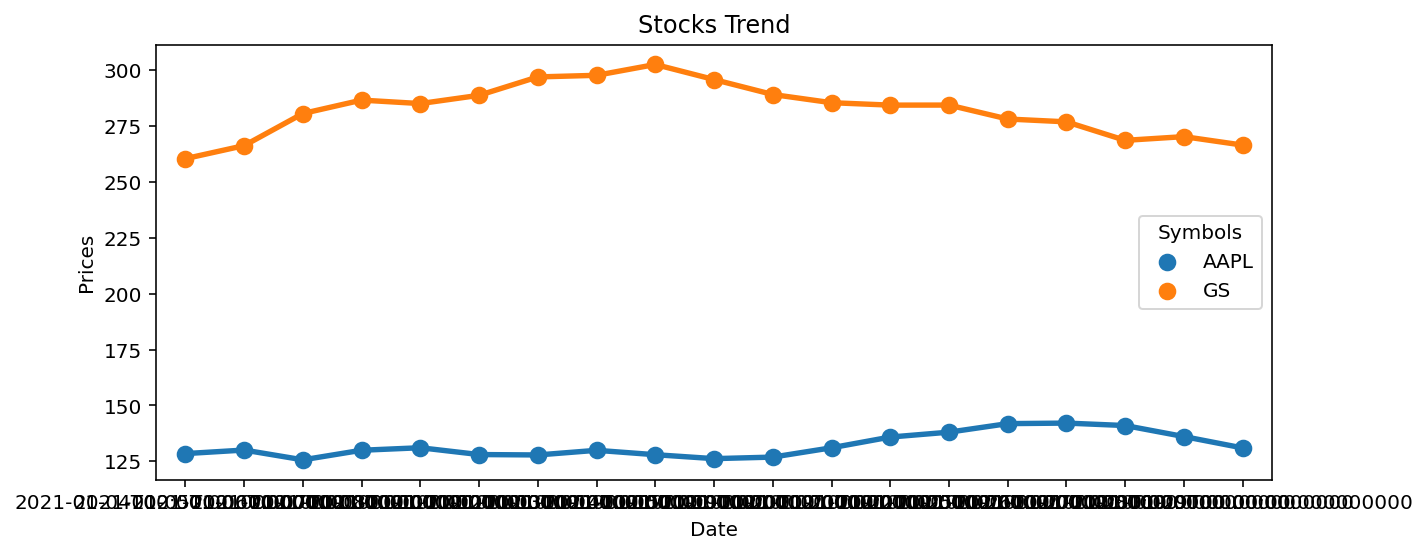

In [11]:
#check trend of teh stock prices
plt.figure(figsize=(10, 4))
plt.title('Stocks Trend')

sns.pointplot(stocks_df['Date'].astype('<M8[D]'),y=stocks_df['Prices'],hue=stocks_df['Symbols'])

plt.show();

In [12]:
def create_time_features(df):
    """
    Creates time series features from datetime index
    """
    df['date'] = pd.to_datetime(df['Date'])
#     df['hour'] = df['date'].dt.hour
    df['dayofweek'] = np.where(df['date'].dt.dayofweek<5,1,0)
    df['dayofweek1'] = df['date'].dt.dayofweek
    df['norms']=2*np.pi*df['dayofweek1']/df['dayofweek1'].max()
#     df['cosday']==np.cos(df['norms'])
#     df['sinday']==np.sin(df['norms'])
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['sin_day'] = np.sin(df['dayofyear'])
    df['cos_day'] = np.cos(df['dayofyear'])
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['end']=df['date'].dt.is_month_end
    df['weekofmonth']=(df['date'].dt.day-1)//7+1

    X = df
    return X

In [13]:
stocks_df.head()

,Date,Symbols,Prices
1,2021-01-04,AAPL,128.453445
3,2021-01-05,AAPL,130.041611
5,2021-01-06,AAPL,125.664207
7,2021-01-07,AAPL,129.952271
9,2021-01-08,AAPL,131.073929


In [14]:
def feat_eng(df):
    '''This is a tsfresh function to pivot the data and create aggregates with tsfresh and pick relevant ones
    INPUT:
    stocks_df: a dataframe with prices 
    
    OUTPUT:
    train_model_df: output dataframe with date features'''

    train_model_df=create_time_features(df.sort_values(by=['Symbols','Date'])).drop(['Date','date'],1)
    train_model_df=train_model_df.rename(columns={'Prices':'y'})

    return train_model_df

In [15]:
train_features=feat_eng(stocks_df)
train_features.head()

<ipython-input-12-0a40efbcd0cb>:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


,Symbols,y,dayofweek,dayofweek1,norms,quarter,month,year,dayofyear,sin_day,cos_day,dayofmonth,weekofyear,end,weekofmonth
1,AAPL,128.453445,1,0,0.000000,1,1,2021,4,-0.756802,-0.653644,4,1,False,1
3,AAPL,130.041611,1,1,1.570796,1,1,2021,5,-0.958924,0.283662,5,1,False,1
5,AAPL,125.664207,1,2,3.141593,1,1,2021,6,-0.279415,0.960170,6,1,False,1
7,AAPL,129.952271,1,3,4.712389,1,1,2021,7,0.656987,0.753902,7,1,False,1
9,AAPL,131.073929,1,4,6.283185,1,1,2021,8,0.989358,-0.145500,8,1,False,2


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
models=[]
symbols=[]
test_df=[]
validation_period=7
for i in train_features['Symbols'].unique():

        train1=train_features[train_features['Symbols']==i].drop('Symbols',1)
        train=train1.iloc[:-validation_period]
        test=train1.iloc[-validation_period:]

        X = train.drop('y',1)
        y = train["y"]
        model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

        # define model evaluation method
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
        # evaluate model
        scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
        # force scores to be positive
        scores = np.absolute(scores)
        print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
        
        model.fit(X=x_train, y=y_train)

        predicts=model.predict(test.drop('y',1))
        test=test.reset_index()
        test['pred']=predicts
        models.append(model)
    
        test_df.append(test)
        symbols.append(i)


Mean MAE: 2.503 (0.920)


NameError: name 'x_train' is not defined

In [ ]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [17]:


validation_period=7

def models_training(train_features,models_to_explore:int,validation_period:int):
    '''INPUT:
    train_features: dataframe with training features, all symbols and label
    validation_period: validation period as int
    
    OUTPUT:
    
    models: list of best models per symbol
    symbols: list of symbols
    test_df: dataframe with test predictions'''
    global models
    global symbols
    global test_df
    models=[]
    symbols=[]
    test_df=[]
    for i in train_features['Symbols'].unique():

        h2o.init(port=54321,max_mem_size_GB=16,nthreads=10)

        train1=train_features[train_features['Symbols']==i].drop('Symbols',1)
    #     n=train1.shape[0]
    #     test_cut=math.ceil(n*0.3)
        train=train1.iloc[:-validation_period]
        test=train1.iloc[-validation_period:]
        train2 = h2o.H2OFrame(train)
        test2 = h2o.H2OFrame(test)


        x_train = train2.columns
        y_train = "y"
        x_train.remove(y_train)


        # Run AutoML for 20 base models (limited to 1 hour max runtime by default)
        aml = H2OAutoML(max_models=models_to_explore, seed=1)
        aml.train(x=x_train, y=y_train, training_frame=train2)

        # View the AutoML Leaderboard
        lb = aml.leader
        predicts=aml.leader.predict(test2).as_data_frame()
        test=test.reset_index()
        test['pred']=predicts

        models.append(lb)
    
        test_df.append(test)
        symbols.append(i)

#     h2o.shutdown()
        
    return models,symbols,test_df


In [18]:
models,symbols,test_df=models_training(train_features,20,7)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_191"; Java(TM) SE Runtime Environment (build 1.8.0_191-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from /usr/local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/0h/nvs8wbbs5h9dn21n5sg7_s3m0000gq/T/tmpyrg4obtq
  JVM stdout: /var/folders/0h/nvs8wbbs5h9dn21n5sg7_s3m0000gq/T/tmpyrg4obtq/h2o_hmwangila_started_from_python.out
  JVM stderr: /var/folders/0h/nvs8wbbs5h9dn21n5sg7_s3m0000gq/T/tmpyrg4obtq/h2o_hmwangila_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Africa/Nairobi
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_hmwangila_e5vxiy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,14.21 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
11:52:13.94: _train param, Dropping bad and constant columns: [dayofweek, end, month, year, quarter]


11:52:15.174: _train param, Dropping bad and constant columns: [dayofweek, end, month, year, quarter]

█
11:52:16.199: _train param, Dropping bad and constant columns: [dayofweek, end, month, year, quarter]
11:52:16.199: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 12.0.
11:52:16.221: _train param, Dropping unused columns: [dayofweek, end, month, year, quarter]

█
11:52:17.238: _train param, Dropping bad and constant columns: [dayofweek, end, month, year, quarter]
11:52:18.254: _train param, Dropping bad and constant columns: [dayofweek, end, month, year, quarter]

█████
11:52:24.373: _train pa

H2O_cluster_uptime:,4 mins 51 secs
H2O_cluster_timezone:,Africa/Nairobi
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_hmwangila_e5vxiy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,14.18 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
11:56:55.965: _train param, Dropping bad and constant columns: [dayofweek, end, month, year, quarter]


11:56:56.978: _train param, Dropping bad and constant columns: [dayofweek, end, month, year, quarter]

█
11:56:57.987: _train param, Dropping bad and constant columns: [dayofweek, end, month, year, quarter]
11:56:57.987: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 12.0.
11:56:57.990: _train param, Dropping unused columns: [dayofweek, end, month, year, quarter]

█
11:56:58.994: _train param, Dropping bad and constant columns: [dayofweek, end, month, year, quarter]


11:57:00.1: _train param, Dropping bad and constant columns: [dayofweek, end, month, year, quarter]

█
11:57:01.10: _train param,

In [19]:
len(models)

2

In [20]:
symbols

['AAPL', 'GS']

In [21]:
train_features['Symbols'].unique()

array(['AAPL', 'GS'], dtype=object)

In [47]:
def prediction(models, symbols, target_date):

    """INPUT: models: a list of trained models
    symbols: a list of tickers to predict
    target_date: a date you need predicted"""
    df= pd.DataFrame(
          {'Date' : target_date
          }
        )
    feats=create_time_features(df).drop(['Date','date'],1)

    
    prices_predictions = pd.DataFrame(columns = ['Date', 'Ticker', 'Prediction'])

    for model, symbol in zip(models, symbols):
        pred_df = h2o.H2OFrame(feats)

        prediction = model.predict(pred_df).as_data_frame()['predict']
        print(prediction)
        predicted_df = pd.DataFrame(
          {'Date' : target_date,
          'Ticker' : symbol,
          'Prediction' : prediction
          }
        )

        prices_predictions = prices_predictions.append(predicted_df, ignore_index = True)

    return prices_predictions


In [45]:
preds=prediction(models, symbols, pd.date_range(pd.to_datetime('2022-01-01'),pd.to_datetime('2022-01-05'),freq='d'))
preds

Parse progress: |

<ipython-input-12-0a40efbcd0cb>:19: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
0    129.146910
1    128.792223
2    128.430568
3    128.744138
4    129.199711
Name: predict, dtype: float64
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
0    273.082857
1    272.621277
2    261.752677
3    262.952469
4    270.622706
Name: predict, dtype: float64


,Date,Ticker,Prediction
0,2022-01-01,AAPL,129.146910
1,2022-01-02,AAPL,128.792223
2,2022-01-03,AAPL,128.430568
3,2022-01-04,AAPL,128.744138
4,2022-01-05,AAPL,129.199711
5,2022-01-01,GS,273.082857
6,2022-01-02,GS,272.621277
7,2022-01-03,GS,261.752677
8,2022-01-04,GS,262.952469
9,2022-01-05,GS,270.622706


In [48]:
import plotly.express as px

fig=px.line(preds,x='Date',y='Prediction',color='Ticker',line_group='Ticker',hover_name='Ticker',title='Price Predictions')
fig.show();

NameError: name 'corporate_layout' is not defined

In [ ]:
def test_performance(models,symbols,validation_date):
    '''INPUT test_df with: forecasted: the forecasted column actual: the actual column OUTPUT: mape: mean absolute percentage error'''
    mape_df=pd.DataFrame()
    for i in (7,14,28):
        
        df=stock_picker(symbols,'yahoo',pd.to_datetime(pd.to_datetime(validation_date)-timedelta(i)),validation_date)

        df2=feat_eng(df)
    
        for p,j in zip(range(len(symbols)),symbols):
            df3=df2[df2['Symbols']==j]
            print(df3)
            pred_df = h2o.H2OFrame(df3.drop(['Symbols','y'],1))
            df3=df3.reset_index(drop=True)
            df3['pred'] = models[p].predict(pred_df).as_data_frame()['predict']
            df3['symbol']=symbols[p]
            df3['period']=i
            print(df3)
            
            
            error = abs(df3['pred']-df3['y'])
            mae = error/df3['y']
            mape = (mae*100).mean()
            print('MAPE for {} is {}% on {} days of data from validation date'.format(symbols[p],round(mape,3),i))
            print(df3['symbol'][0])
            mape_df=mape_df.append(pd.DataFrame(
          {'days_from_validation_date' :i,
          'Ticker' : df3['symbol'][0],
          'MAPE' : mape
          },
      index=[0]
        ))
    return mape_df
    

In [ ]:
val=test_performance(models,symbols,'2022-01-01')
val.to_dict('records')

## APP

In [1]:
from dash import Dash, dcc, html, Input, Output, State

In [1]:

from dash_extensions.enrich import Output, Dash, Trigger

/usr/local/lib/python3.8/site-packages/dash_extensions/enrich.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
